# Udacity Twitter Project
## The purpose of this project was to practice using three different ways to obtain data. Importing from a .csv a .tsv and using an API to collect data from a website. In this project I used twitters tweepy package to download the data. 

## The next objective was to assess and clean the data for a final analysis of the dataframe.


# Project: Wrangling and Analyze Data

## Import Libraries

In [1]:
import requests
import numpy as np
import pandas as pd
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy

pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [5]:
df_archive.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [7]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response.status_code

200

In [8]:
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

df_image = pd.read_csv("image_predictions.tsv", sep='\t')

In [9]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
df_image.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [25]:
len(fails_dict)

30

In [11]:
json_df = pd.read_json("tweet_json.txt", lines=True, encoding='utf=8')
json_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'all our links ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9376130, 'friends_count': 20, 'listed_count': 7843, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147600, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17400...",NaN,NaN,None,NaN,False,6894,32974,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/D

In [12]:
json_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'all our links ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9376130, 'friends_count': 20, 'listed_count': 7843, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147600, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17400...",NaN,NaN,None,NaN,False,6894,32974,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/D

In [13]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [14]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Make a copy of each dataframe for further assessment and cleaning.

In [15]:
json_df_copy = json_df.copy()

In [16]:
df_archive_copy = df_archive.copy()

In [17]:
df_image_copy = df_image.copy()

Before doing any further assessment, I noticed 3 immediate issues that needed to be sorted before joining the tables.

### Quality issues
1. json_df does not contain a column that can be used for joining tables.
2. json_df contains many unnecessary columns.
3. Each dataframe has a different total number of rows therefore some rows will have missing values.

#### Issue #1: json_df does not contain a column that can be used for joining tables.
#### Define: Change column 'id' to 'tweet_id'

In [18]:
# Code
json_df_copy.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [19]:
json_df_copy.head()

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'all our links ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2Xq4Va2', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2Xq4Va2', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9376130, 'friends_count': 20, 'listed_count': 7843, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147600, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17400...",NaN,NaN,None,NaN,False,6894,32974,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/m

#### Issue #2: json_df contains many unnecessary columns.
#### Define: Remove extra columns from json_df

In [21]:
# Code
json_df_copy = json_df_copy[['tweet_id', 'favorite_count', 'retweet_count']]

#### Test

In [22]:
json_df_copy.shape

(2326, 3)

#### Issue #3 & #13
#### Define: Combine the 3 dataframes to one complete dataframe  where each row represents a single tweet using an inner left join to only have data that has images and tweet data.

In [23]:
# Code
complete_df = df_archive_copy.merge(df_image_copy, how='inner', on='tweet_id').merge(json_df_copy, how='inner', on='tweet_id')

#### Test

In [24]:
complete_df.shape

(2056, 30)

In [25]:
complete_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

Wrote the joined tables to a new dataframe - complete_df.csv

In [26]:
df = pd.read_csv('complete_df.csv')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [27]:
# Check data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2056 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2056 non-null   object 
 4   source                      2056 non-null   object 
 5   text                        2056 non-null   object 
 6   retweeted_status_id         70 non-null     float64
 7   retweeted_status_user_id    70 non-null     float64
 8   retweeted_status_timestamp  70 non-null     object 
 9   expanded_urls               2056 non-null   object 
 10  rating_numerator            2056 non-null   int64  
 11  rating_denominator          2056 non-null   int64  
 12  name                        2056 non-null   object 
 13  doggo                       2056 

In [28]:
list(df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count']

In [29]:
df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1835,670086499208155136,NaN,NaN,2015-11-27 03:47:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Hi yes this is dog. I can't help with that s- sir please... the manager isn't in right n- well that was rude""\n10/10 https://t.co/DuQXATW27f",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670086499208155136/photo/1,10,10,None,None,None,None,None,https://pbs.twimg.com/media/CUygHhFXAAAwNXv.jpg,1,German_short-haired_pointer,0.273492,True,Staffordshire_bullterrier,0.132944,True,bluetick,0.124562,True,604,215
1465,679148763231985668,NaN,NaN,2015-12-22 03:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I know everyone's excited for Christmas but that doesn't mean you can send in reindeer. We only rate dogs... 8/10 https://t.co/eWjWgbOCYL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679148763231985668/photo/1,8,10,None,None,None,None,None,https://pbs.twimg.com/media/CWzSMmAWsAAyB1u.jpg,1,Italian_greyhound,0.302685,True,hair_slide,0.124281,False,Afghan_hound,0.059846,True,2497,907
1260,690959652130045952,NaN,NaN,2016-01-23 18:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This golden is happy to refute the soft mouth egg test. Not a fan of sweeping generalizations. 11/10 #notallpuppers https://t.co/DgXYBDMM3E,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/690959652130045952/photo/1,https://twitter.com/dog_rates/status/690959652130045952/photo/1,https://twitter.com/dog_rates/status/690959652130045952/photo/1,https://twitter.com/dog_rates/status/690959652130045952/photo/1",11,10,None,None,None,None,None,https://pbs.twimg.com/media/CZbIIM-WkAIPClg.jpg,2,golden_retriever,0.862964,True,Labrador_retriever,0.044865,True,Saluki,0.012468,True,3251,1094
20,887705289381826560,NaN,NaN,2017-07-19 16:06:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jeffrey. He has a monopoly on the pool noodles. Currently running a 'boop for two' midweek sale. 13/10 h*ckin strategic https://t.co/PhrUk20Q64,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887705289381826560/photo/1,13,10,Jeffrey,None,None,None,None,https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg,1,basset,0.821664,True,redbone,0.087582,True,Weimaraner,0.026236,True,25908,4456
418,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True,8191,2035
216,839990271299457024,NaN,NaN,2017-03-10 00:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sojourner. His nose is a Fibonacci Spiral. Legendary af. 13/10 we must protect him at all costs https://t.co/r7W1NbkOtr,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/839990271299457024/photo/1,https://twitter.com/dog_rates/status/839990271299457024/photo/1",13,10,Sojourner,None,None,None,None,https://pbs.twimg.com/media/C6g-sX-VsAAHfJ9.jpg,2,Staffordshire_bullterrier,0.604938,True,American_Staffordshire_terrier,0.311540,True,Boston_bull,0.037159,True,12217,2034
1879,669203728096960512,NaN,NaN,2015-11-24 17:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter 

In [30]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,32974,6894
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,28514,5195
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,21440,3428
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,35985,7108
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,34395,7624


In [31]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
2051,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,87,36
2052,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,244,113
2053,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,98,35
2054,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,111,39
2055,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,2235,416


In [32]:
# Check the dist of ratings numbers for any incosistencies.
df[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2056.000000,2056.000000
mean,12.265078,10.516051
std,40.867720,7.210005
min,0.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [33]:
# Check numerator values above 20 against text.
df.query('rating_numerator > 20')[['text','rating_numerator']]

,text,rating_numerator
334,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
404,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
546,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
601,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
719,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165
786,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776
908,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204
985,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1006,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99
1031,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80


In [34]:
# Check numerator values below 10 against text.
df.query('rating_numerator < 10')[['text','rating_numerator']]

,text,rating_numerator
40,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
179,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6
239,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0
576,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5
602,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3
...,...,...
2051,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5
2052,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6
2053,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9
2054,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7


In [35]:
# Check numerator values above 20 against text.
df.query('rating_denominator > 20')[['text','rating_denominator']]

,text,rating_denominator
334,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
719,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
908,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
985,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1006,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1031,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1049,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50
1115,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,50
1191,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40
1363,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",130


In [36]:
# Check numerator values below 10 against text.
df.query('rating_denominator < 10')[['text','rating_denominator']]

,text,rating_denominator
404,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
2035,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2


In [37]:
# Check names value_counts
df.name.value_counts()

None          570
a              55
Charlie        10
Penny          10
Cooper         10
             ... 
Emma            1
Luna            1
Spencer         1
Lilli           1
Christoper      1
Name: name, Length: 934, dtype: int64

In [38]:
# Check for retweets
df.retweeted_status_user_id.value_counts()

4.196984e+09    59
4.296832e+09     2
7.874618e+17     1
3.638908e+08     1
5.970642e+08     1
4.119842e+07     1
8.117408e+08     1
4.871977e+08     1
1.228326e+09     1
2.804798e+08     1
7.832140e+05     1
Name: retweeted_status_user_id, dtype: int64

In [39]:
len(df.retweeted_status_id.value_counts())

70

In [40]:
len(df.retweeted_status_timestamp.value_counts())

70

In [41]:
mask = df.in_reply_to_status_id.notnull()
df[mask][['tweet_id', 'text']]

,tweet_id,text
120,863079547188785154,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen"
148,856526610513747968,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA"
195,844979544864018432,"PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B"
446,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze"
816,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"
818,746818907684614144,Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ
915,729838605770891264,"""Challenge completed"" \n(pupgraded to 12/10) https://t.co/85dTK7XCXB"
1096,705786532653883392,"Seriously, add us 🐶 11/10 for sad wet pupper https://t.co/xwPE9faVZR"
1105,704871453724954624,I found a forest Pipsy. 12/10 https://t.co/mIQ1KoVsmU
1120,703425003149250560,"Really guys? Again? I know this is a rare Albanian Bingo Seal, but we only rate dogs. Only send in dogs... 9/10 https://t.co/6JYLpUmBrC"


In [42]:
# Check for replies
df.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.558181e+17    1
6.715610e+17    1
6.747522e+17    1
6.717299e+17    1
6.747934e+17    1
6.749998e+17    1
6.754971e+17    1
6.757073e+17    1
6.842229e+17    1
6.844811e+17    1
6.920419e+17    1
6.706684e+17    1
6.753494e+17    1
7.030419e+17    1
7.032559e+17    1
7.291135e+17    1
6.914169e+17    1
7.468859e+17    1
7.331095e+17    1
7.590995e+17    1
6.678065e+17    1
Name: in_reply_to_status_id, dtype: int64

In [43]:
df.in_reply_to_user_id.value_counts()

4.196984e+09    23
Name: in_reply_to_user_id, dtype: int64

In [44]:
len(df.in_reply_to_status_id.value_counts())

22

### Quality issues
1. json_df does not contain a column that can be used for joining tables. (Completed)

2. json_df contains many unnecessary columns.(Completed)

3. Each dataframe has a different total number of rows therefore some rows will have missing values. (Completed)

4. Contains 70 retweets.

5. Contains 23 replies.

6. Timestamp is not datetime format.

7. All tweets after August 1st, 2017 should be removed.

8. Numerator and Denominator sometimes takes the wrong information.

9. Ratings numerators and denominators have outliers.

10. Extra columns that are not needed for analysis should be removed.

### Tidiness issues
11. All three dataframes should be joined into a single dataframe as each row represents a single tweet. (Completed)

12. Dog stages should be converted into a single columns with original columns as values.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [45]:
# Make copies of original pieces of data
df_clean = df.copy()

#### Issue #4:

#### Define: Delete retweets.


#### Code

In [46]:
df_clean = df_clean[pd.isnull(df_clean['retweeted_status_user_id'])]

#### Test

In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2055
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1986 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1986 non-null   object 
 4   source                      1986 non-null   object 
 5   text                        1986 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1986 non-null   object 
 10  rating_numerator            1986 non-null   int64  
 11  rating_denominator          1986 non-null   int64  
 12  name                        1986 non-null   object 
 13  doggo                       1986 

##### Issue #5:

#### Define: Delete Replies

#### Code

In [48]:
df_clean = df_clean[pd.isnull(df_clean['in_reply_to_user_id'])]

#### Test

In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2055
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1963 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1963 non-null   object 
 4   source                      1963 non-null   object 
 5   text                        1963 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1963 non-null   object 
 10  rating_numerator            1963 non-null   int64  
 11  rating_denominator          1963 non-null   int64  
 12  name                        1963 non-null   object 
 13  doggo                       1963 

In [50]:
# Dropping the columns that contain retweet data and reply data as they are now unnecessary. 
df_clean = df_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2055
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1963 non-null   int64  
 1   timestamp           1963 non-null   object 
 2   source              1963 non-null   object 
 3   text                1963 non-null   object 
 4   expanded_urls       1963 non-null   object 
 5   rating_numerator    1963 non-null   int64  
 6   rating_denominator  1963 non-null   int64  
 7   name                1963 non-null   object 
 8   doggo               1963 non-null   object 
 9   floofer             1963 non-null   object 
 10  pupper              1963 non-null   object 
 11  puppo               1963 non-null   object 
 12  jpg_url             1963 non-null   object 
 13  img_num             1963 non-null   int64  
 14  p1                  1963 non-null   object 
 15  p1_conf             1963 non-null   float64
 16  p1_dog

##### Issue #6: Timestamp is not datetime format.

#### Define: Use datetime function to change data type.

#### Code

In [52]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#### Test

In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2055
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   source              1963 non-null   object             
 3   text                1963 non-null   object             
 4   expanded_urls       1963 non-null   object             
 5   rating_numerator    1963 non-null   int64              
 6   rating_denominator  1963 non-null   int64              
 7   name                1963 non-null   object             
 8   doggo               1963 non-null   object             
 9   floofer             1963 non-null   object             
 10  pupper              1963 non-null   object             
 11  puppo               1963 non-null   object             
 12  jpg_url             1963 non-null 

#### Issue #7: All tweets after August 1st, 2017 should be removed. As per project guidelines.

#### Define: Remove any tweets after this date.

#### Code

In [54]:
df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1017,712085617388212225,2016-03-22 01:16:55+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Olive and Ruby. They are best buddies. Both 11/10 \n1 like = 1 buddy https://t.co/yagmFdKlyL,"https://twitter.com/dog_rates/status/712085617388212225/photo/1,https://twitter.com/dog_rates/status/712085617388212225/photo/1,https://twitter.com/dog_rates/status/712085617388212225/photo/1",11,10,Olive,None,None,None,None,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True,2949,430
415,808733504066486276,2016-12-13 18:01:07+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a pupper in a onesie. Quite pupset about it. Currently plotting revenge. 12/10 would rescue https://t.co/xQfrbNK3HD,https://twitter.com/dog_rates/status/808733504066486276/photo/1,12,10,None,None,None,pupper,None,https://pbs.twimg.com/media/Czky0v9VIAEXRkd.jpg,1,seat_belt,0.779137,False,toy_poodle,0.036927,True,golden_retriever,0.016972,True,7322,2006
578,781251288990355457,2016-09-28 21:56:36+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oakley. He just got yelled at for going 46 in a 45. Churlish af. 11/10 would still pet so well https://t.co/xIYsa6LPA4,"https://twitter.com/dog_rates/status/781251288990355457/photo/1,https://twitter.com/dog_rates/status/781251288990355457/photo/1",11,10,Oakley,None,None,None,None,https://pbs.twimg.com/media/CteP5H5WcAEhdLO.jpg,2,Mexican_hairless,0.887771,True,Italian_greyhound,0.030666,True,seat_belt,0.026730,False,7711,1903
1938,668142349051129856,2015-11-21 19:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2,https://twitter.com/dog_rates/status/668142349051129856/photo/1,2,10,None,None,None,None,None,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,1,Angora,0.918834,False,hen,0.037793,False,wood_rabbit,0.011015,False,503,235
1450,679862121895714818,2015-12-24 03:12:15+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Dammit hooman I'm jus trynna lik the fler"" 11/10 https://t.co/eRZRI8OTj7",https://twitter.com/dog_rates/status/679862121895714818/photo/1,11,10,None,None,None,None,None,https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg,1,EntleBucher,0.523206,True,Greater_Swiss_Mountain_dog,0.431657,True,Appenzeller,0.044208,True,2194,544


In [55]:
len(df_clean[(df_clean['timestamp'] >= '2017-08-01')])

2

In [56]:
len(df_clean[(df_clean['timestamp'] < '2017-08-01')])

1961

In [57]:
df_clean = df_clean[(df_clean['timestamp'] < '2017-08-01')]

#### Test

In [58]:
len(df_clean[(df_clean['timestamp'] >= '2017-08-01')])

0

#### Issue #8: Numerator and Denominator sometimes takes the wrong information. 
#### Issue #9: Ratings numerators and denominators have outliers.

#### Define: Correct rows that have wrong information.

##### Denominator Row Errors:
- 334 The floofs have been released I repeat the floofs have been released. 84/70
- 719 Why does this never happen at my front door... 165/150
- 860 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. 
- 908 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once 
- 951 Happy 4/20 from the squad! 13/10 for all 
- 985 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 
- 1006 Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody
- 1031 Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 
- 1049 From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once 
- 1115 Here is a whole flock of puppers.  60/50 I'll take the lot
- 1191 Happy Wednesday here's a bucket of pups. 44/40 would pet all at once
- 1364 Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 
- 1389 This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 
- 1495 IT'S PUPPERGEDDON. Total of 144/120 ...I think 
- 1554 Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once 

##### Numerator  Row Errors:
- 334 The floofs have been released I repeat the floofs have been released. 84/70 
- 404 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this 
- 546 This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10
- 601 This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back
- 719 Why does this never happen at my front door... 165/150
- 786 This is Atticus. He's quite simply America af. 1776/10
- 908 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once
- 985 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10
- 1006 Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody
- 1031 Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80
- 1049 From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once
- 1115 Here is a whole flock of puppers.  60/50 I'll take the lot
- 1191                                                                                 Happy Wednesday here's a bucket of pups. 44/40 would pet all at once
- 1364 Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110
- 1435 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10
- 1495 IT'S PUPPERGEDDON. Total of 144/120 ...I think
- 1554 Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once
- 1778 After so many requests... here you go.\n\nGood dogg. 420/10

#### Code

In [59]:
# Start with cleaning up the denominators
df_clean.rating_denominator.value_counts()

10     1944
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [60]:
print(df_clean.loc[df_clean.rating_denominator > 10, 'text']) 

334                                                    The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
719                                                                         Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
860           After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
908                              Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
951                                                                                       Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
985                                  This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1006                                                         Happy Sat

In [61]:
print(df_clean.loc[df_clean.rating_denominator > 10, 'tweet_id']) 

334     820690176645140481
719     758467244762497024
860     740373189193256964
908     731156023742988288
951     722974582966214656
985     716439118184652801
1006    713900603437621249
1031    710658690886586372
1049    709198395643068416
1115    704054845121142784
1191    697463031882764288
1364    684222868335505415
1389    682962037429899265
1495    677716515794329600
1554    675853064436391936
Name: tweet_id, dtype: int64


In [62]:
print(df_clean.loc[df_clean.rating_numerator >= 15, 'text']) 

334                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
404     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
546                                              This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
601             This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
719                                                                                                Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
786                                                                                                This is Att

In [63]:
print(df_clean.loc[df_clean.rating_numerator >= 15, 'tweet_id']) 

334     820690176645140481
404     810984652412424192
546     786709082849828864
601     778027034220126208
719     758467244762497024
786     749981277374128128
908     731156023742988288
985     716439118184652801
1006    713900603437621249
1031    710658690886586372
1049    709198395643068416
1115    704054845121142784
1191    697463031882764288
1364    684222868335505415
1435    680494726643068929
1495    677716515794329600
1554    675853064436391936
1778    670842764863651840
Name: tweet_id, dtype: int64


##### After checking through some of these posts, I noticed some of the higher ratings are for multiple dogs. Decided to delete the tweets with multiple doggos.

In [64]:
# Delete tweet_id's
# 820690176645140481, 758467244762497024,
# 731156023742988288, 722974582966214656, 
# 713900603437621249, 710658690886586372,
# 709198395643068416, 704054845121142784,
# 697463031882764288, 684222868335505415,
# 680494726643068929, 677716515794329600,
# 675853064436391936
df_clean = df_clean[df_clean['tweet_id'] != 820690176645140481]
df_clean = df_clean[df_clean['tweet_id'] != 758467244762497024]
df_clean = df_clean[df_clean['tweet_id'] != 731156023742988288]
df_clean = df_clean[df_clean['tweet_id'] != 722974582966214656]
df_clean = df_clean[df_clean['tweet_id'] != 713900603437621249]
df_clean = df_clean[df_clean['tweet_id'] != 710658690886586372]
df_clean = df_clean[df_clean['tweet_id'] != 709198395643068416]
df_clean = df_clean[df_clean['tweet_id'] != 704054845121142784]
df_clean = df_clean[df_clean['tweet_id'] != 697463031882764288]
df_clean = df_clean[df_clean['tweet_id'] != 684222868335505415]
df_clean = df_clean[df_clean['tweet_id'] != 680494726643068929]
df_clean = df_clean[df_clean['tweet_id'] != 677716515794329600]
df_clean = df_clean[df_clean['tweet_id'] != 675853064436391936]

In [65]:
# Delete tweet_id with no ratings
# 810984652412424192
df_clean = df_clean[df_clean['tweet_id'] != 810984652412424192]

In [66]:
print(df_clean.loc[df_clean.rating_denominator > 10, 'text']) 

860     After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
985                            This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1389     This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Name: text, dtype: object


In [67]:
print(df_clean.loc[df_clean.rating_numerator >= 15, 'text']) 

546                                      This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
601     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
786                                                                                        This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
985                                                 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1778                                                                                  After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY
Name: text, dtype: object


In [68]:
print(df_clean.loc[df_clean.rating_numerator >= 15, 'tweet_id']) 

546     786709082849828864
601     778027034220126208
786     749981277374128128
985     716439118184652801
1778    670842764863651840
Name: tweet_id, dtype: int64


In [69]:
print(df_clean.loc[df_clean.rating_denominator > 10, 'tweet_id']) 

860     740373189193256964
985     716439118184652801
1389    682962037429899265
Name: tweet_id, dtype: int64


In [70]:
# Manually change remaining row ratings that take incorrect ratings

df_clean.loc[(df_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
df_clean.loc[(df_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

df_clean.loc[(df_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 11
df_clean.loc[(df_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

df_clean.loc[(df_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
df_clean.loc[(df_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

# Manually change outliers with max value of 15. I chose 15 as the upper limit.

df_clean.loc[(df_clean.tweet_id == 749981277374128128), 'rating_numerator'] = 15
df_clean.loc[(df_clean.tweet_id == 670842764863651840), 'rating_numerator'] = 15

#### Test

In [71]:
print(df_clean.loc[df_clean.rating_numerator > 15, 'text'])

546                                     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
601    This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Name: text, dtype: object


In [72]:
print(df_clean.loc[df_clean.rating_denominator > 10, 'text'])

Series([], Name: text, dtype: object)


In [73]:
print(df_clean.loc[df_clean.rating_denominator < 10, 'text'])

2035    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object


Noticed a row with another incorrectly assigned value

In [74]:
print(df_clean.loc[df_clean.rating_denominator < 10, 'tweet_id'])

2035    666287406224695296
Name: tweet_id, dtype: int64


In [75]:
# Manually change remaining row that takes incorrect ratings

df_clean.loc[(df_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
df_clean.loc[(df_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

#### Test

In [76]:
print(df_clean.loc[df_clean.rating_denominator < 10, 'text'])

Series([], Name: text, dtype: object)


In [77]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 2 to 2055
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1947 non-null   int64              
 1   timestamp           1947 non-null   datetime64[ns, UTC]
 2   source              1947 non-null   object             
 3   text                1947 non-null   object             
 4   expanded_urls       1947 non-null   object             
 5   rating_numerator    1947 non-null   int64              
 6   rating_denominator  1947 non-null   int64              
 7   name                1947 non-null   object             
 8   doggo               1947 non-null   object             
 9   floofer             1947 non-null   object             
 10  pupper              1947 non-null   object             
 11  puppo               1947 non-null   object             
 12  jpg_url             1947 non-null 

I noticed now that some ratings have fractions.

In [78]:
display(df_clean[df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\giddi\AppData\Local\Temp\ipykernel_9796\3766117491.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(df_clean[df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
546,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
601,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [79]:
# Convert numerators to floats and update these 3 values.
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)

In [80]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 2 to 2055
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1947 non-null   int64              
 1   timestamp           1947 non-null   datetime64[ns, UTC]
 2   source              1947 non-null   object             
 3   text                1947 non-null   object             
 4   expanded_urls       1947 non-null   object             
 5   rating_numerator    1947 non-null   float64            
 6   rating_denominator  1947 non-null   int64              
 7   name                1947 non-null   object             
 8   doggo               1947 non-null   object             
 9   floofer             1947 non-null   object             
 10  pupper              1947 non-null   object             
 11  puppo               1947 non-null   object             
 12  jpg_url             1947 non-null 

In [81]:
# Manually input the correct numbers.

df_clean.loc[(df_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
df_clean.loc[(df_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
df_clean.loc[(df_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27

#### Test

In [82]:
display(df_clean[df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\giddi\AppData\Local\Temp\ipykernel_9796\3766117491.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(df_clean[df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10
546,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
601,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10


In [83]:
df_clean[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,1947.000000,1947.0
mean,10.539558,10.0
std,2.174919,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,15.000000,10.0


In [84]:
print(df_clean.loc[df_clean.rating_numerator < 3 , 'text']) 

239                                When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
1479    Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r
1482    This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz
1579                       What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0
1626      This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ
1783     Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT
1795        Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting does

In [85]:
print(df_clean.loc[df_clean.rating_numerator < 3, 'tweet_id']) 

239     835152434251116546
1479    678675843183484930
1482    678424312106393600
1579    675153376133427200
1626    674265582246694913
1783    670826280409919488
1795    670783437142401025
1938    668142349051129856
1947    667878741721415682
1962    667549055577362432
2010    666786068205871104
2026    666411507551481857
2038    666104133288665088
2049    666051853826850816
Name: tweet_id, dtype: int64


After further assessment, I noticed that most of these very low ratings are not dogs so I can safely delete them.

In [86]:
df_clean = df_clean[df_clean['tweet_id'] != 835152434251116546]
df_clean = df_clean[df_clean['tweet_id'] != 678675843183484930]
df_clean = df_clean[df_clean['tweet_id'] != 678424312106393600]
df_clean = df_clean[df_clean['tweet_id'] != 675153376133427200]
df_clean = df_clean[df_clean['tweet_id'] != 674265582246694913]
df_clean = df_clean[df_clean['tweet_id'] != 670826280409919488]
df_clean = df_clean[df_clean['tweet_id'] != 670783437142401025]
df_clean = df_clean[df_clean['tweet_id'] != 668142349051129856]
df_clean = df_clean[df_clean['tweet_id'] != 667878741721415682]
df_clean = df_clean[df_clean['tweet_id'] != 667549055577362432]
df_clean = df_clean[df_clean['tweet_id'] != 666786068205871104]
df_clean = df_clean[df_clean['tweet_id'] != 666411507551481857]
df_clean = df_clean[df_clean['tweet_id'] != 666104133288665088]
df_clean = df_clean[df_clean['tweet_id'] != 666051853826850816]

#### Test

In [87]:
print(df_clean.loc[df_clean.rating_numerator < 3, 'text']) 

Series([], Name: text, dtype: object)


### Issue #11: Dog Stages should be 1 column.

#### Define: Create a single columns with values from previous columns to show the category of dog.

#### Code

In [88]:
df_clean.doggo.value_counts()

None     1861
doggo      72
Name: doggo, dtype: int64

In [89]:
df_clean.floofer.value_counts()

None       1925
floofer       8
Name: floofer, dtype: int64

In [90]:
df_clean.pupper.value_counts()

None      1724
pupper     209
Name: pupper, dtype: int64

In [91]:
df_clean.puppo.value_counts()

None     1910
puppo      23
Name: puppo, dtype: int64

In [92]:
# Replace 'None' with empty fields

df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

In [93]:
# Create a new column called 'stage' with all stages input

df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

In [94]:
df_clean.stage.value_counts()

                1631
pupper           201
doggo             62
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [95]:
# Correct rows with multipe stages

df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'floofer'

In [96]:
df_clean.stage.value_counts()

           1631
pupper      209
doggo        62
puppo        23
floofer       8
Name: stage, dtype: int64

In [97]:
# Replace empty fields with 'None'

df_clean.stage.replace('', 'None', inplace=True)

In [98]:
# Delete the old columns

df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [99]:
df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,stage
758,752334515931054080,2016-07-11 02:51:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo trying to catch some fish. 8/10 futile af (vid by @KellyBauerx) https://t.co/jwd0j6oWLE,https://twitter.com/dog_rates/status/752334515931054080/video/1,8.0,10,None,https://pbs.twimg.com/ext_tw_video_thumb/752334354492362752/pu/img/uWISPc0YRmhUi9Ju.jpg,1,Bedlington_terrier,0.399163,True,standard_poodle,0.086425,True,wire-haired_fox_terrier,0.075231,True,3515,995,doggo
60,879376492567855104,2017-06-26 16:31:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jack AKA Stephen Furry. You're not scoring on him. Unless he slips down the slide. 12/10 would happily get blocked by https://t.co/0gOi601EAa,https://twitter.com/dog_rates/status/879376492567855104/photo/1,12.0,10,Jack,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True,14478,2616,None
1296,688828561667567616,2016-01-17 21:01:41+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Brad. His car probably has a spoiler. Tan year round. Likes your insta pic but doesn't text back. 9/10 https://t.co/dfCCK3tWfr,https://twitter.com/dog_rates/status/688828561667567616/photo/1,9.0,10,Brad,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1,Cardigan,0.614231,True,skunk,0.139392,False,toilet_tissue,0.031158,False,1257,315,None
1101,705239209544720384,2016-03-03 03:51:44+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jimothy. He lost his body during the the Third Crusade (tragic). 11/10 heroic af tho https://t.co/wnsblfu7XE,https://twitter.com/dog_rates/status/705239209544720384/photo/1,11.0,10,Jimothy,https://pbs.twimg.com/media/CcmDUjFW8AAqAjc.jpg,1,Chihuahua,0.157950,True,toy_terrier,0.089920,True,Mexican_hairless,0.063225,True,2697,666,None
254,832757312314028032,2017-02-18 01:03:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Willow. She's the official strawberry taste tester. Palate delicate af. Currently noting the subtle piquancy of this one. 13/10 https://t.co/On7muWnWSQ,"https://twitter.com/dog_rates/status/832757312314028032/photo/1,https://twitter.com/dog_rates/status/832757312314028032/photo/1",13.0,10,Willow,https://pbs.twimg.com/media/C46MWnFVYAUg1RK.jpg,2,Cardigan,0.160888,True,Staffordshire_bullterrier,0.159441,True,Boston_bull,0.154368,True,15434,3264,None


### Issue #10: Extra columns that are not needed for analysis should be removed.

#### Define: Delete extra columns

#### Code

In [100]:
list(df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count',
 'stage']

In [101]:
df_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num', 'source'], axis=1, inplace=True)

#### Test

In [102]:
df_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,stage
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,21440,3428,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,35985,7108,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,34395,7624,None
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,17324,2553,None
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,10101,1622,None


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [103]:
df_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [104]:
final_data = pd.read_csv('twitter_archive_master.csv')

In [105]:
final_data.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,stage
0,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,21440,3428,None
1,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,35985,7108,None
2,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,34395,7624,None
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,17324,2553,None
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,10101,1622,None


### Insights: #1 What is the distribution of the ratings?

In [106]:
final_data.rating_numerator.describe()

count    1933.000000
mean       10.604511
std         2.043211
min         3.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        15.000000
Name: rating_numerator, dtype: float64

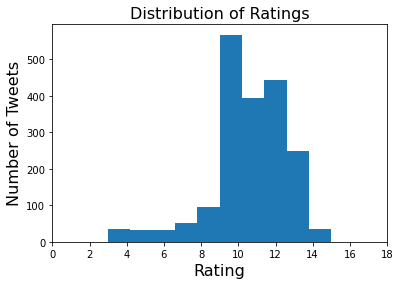

In [107]:
final_data['rating_numerator'].plot(kind = 'hist', bins = 10)

plt.xlim(0, 18)
plt.ylabel('Number of Tweets', fontsize = 16)
plt.xlabel('Rating', fontsize = 16)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

In [108]:
print("Number of tweets with ratings over 10:  {}".format(sum(final_data.rating_numerator >= 10)))
print("Percentage of tweets:                   {}%".format(round(round((sum(final_data.rating_numerator >= 10)) * 100 / final_data.shape[0]), 3)))

Number of tweets with ratings over 10:  1538
Percentage of tweets:                   80%


#### As we can see, 80% of the ratings are over 10 and the distribution of the ratings is heavily left skewed, which is in line with what we expected due to the unique rating system of we love dogs channel.

### Insights: #2 Is there a correlation between favourite count and retweet count?

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


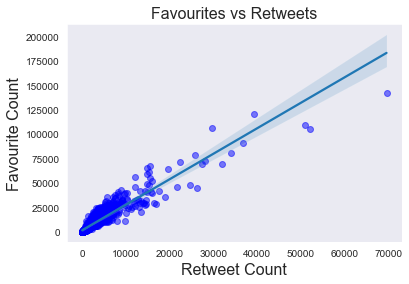

In [109]:
sns.set_style('dark')
fig = sns.regplot(final_data.retweet_count, final_data.favorite_count, scatter_kws = {'color': 'Blue', 'alpha': 0.5})
plt.xlabel("Retweet Count", fontsize = 16)
plt.ylabel("Favourite Count", fontsize = 16)
plt.title("Favourites vs Retweets", fontsize = 16)
plt.show(fig)

#### From the above plot, we can notice a positive correlation between retweet count and favourite count, which makes sense as the more people like a post, the more likely they will retweet it.

### Insights: #3 What were the top 10 most viral tweets (the most retweeted)?

In [110]:
final_data.sort_values(by = 'retweet_count', ascending = False).head(10)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,stage
756,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10,None,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,142063,69536,doggo
791,739238157791694849,2016-06-04 23:31:25+00:00,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,https://twitter.com/dog_rates/status/739238157791694849/video/1,13.0,10,None,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,104861,51988,doggo
388,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13.0,10,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,109262,50801,None
299,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10,None,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,120952,39258,puppo
56,879415818425184262,2017-06-26 19:07:24+00:00,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,https://twitter.com/dog_rates/status/879415818425184262/video/1,13.0,10,Duddles,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,90694,36812,None
322,819004803107983360,2017-01-11 02:15:36+00:00,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",14.0,10,Bo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,80902,33984,doggo
390,806629075125202948,2016-12-07 22:38:52+00:00,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9","https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1",13.0,10,None,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,69077,31871,None
105,866450705531457537,2017-05-22 00:28:40+00:00,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr","https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13.0,10,Jamesy,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,106161,29685,pupper
1384,678399652199309312,2015-12-20 02:20:55+00:00,This made my day. 12/10 please enjoy https://t.co/VRTbo3aAcm,https://twitter.com/dog_rates/status/678399652199309312/video/1,12.0,10,None,https://pbs.twimg.com/ext_tw_video_thumb/678399528077250560/pu/img/BOjUNHRsYLeSo0hl.jpg,72064,28167,None
1441,676219687039057920,2015-12-14 01:58:31+00:00,This is Kenneth. He's stuck in a bubble. 10/10 hang in there Kenneth https://t.co/uQt37xlYMJ,https://twitter.com/dog_rates/status/676219687039057920/photo/1,10.0,10,Kenneth,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,69367,27313,None


#### We can see that the most viral tweet was retweeted 69,536 times and favourited 142,063 times!

# Conclusion
## To conclude, I learnt the importance of iterating over each step, assessing and cleaning, multiple to times to make sure the data is clean. Each time I cleaned and tested a step, I often noticed more items that needed cleaning. I also see the value in breaking down and defining each step of the process so it's easy to keep track of what I have done. Also making copies is very essential as there were a few times where I accidentally deleted or changed some important information in the dataframe and it was easy to reverse by just going back to the original copy code.

I used the following sources for this project:

- https://stackoverflow.com/
- https://www.tutorialspoint.com/
- https://matplotlib.org/
- https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
- Python documentation